# Click [here](#part2) to go to Part 2.

# PART 1

In [1]:
# For data loading, manipulation and analysis
import pandas as pd

#For plotting
from matplotlib import pyplot as plt
%matplotlib inline
# For plotting
import seaborn as sns
sns.set_color_codes("dark")
sns.set(font_scale=1)

# For numeric computations
import numpy as np

In [2]:
print(pd.__version__) #1.3.0
print(sns.__version__) #0.11.1
print(np.__version__) #1.21.0

1.3.0
0.11.1
1.21.0


In [3]:
df_original = pd.read_csv("Insurance Premium Default-Dataset.csv")
df_original.head()

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
0   1                             0.317        11330   90050   
1   2                             0.000        30309  156080   
2   3                             0.015        16069  145020   
3   4                             0.000        23733  187560   
4   5                             0.888        19360  103050   

   Count_3-6_months_late  Count_6-12_months_late  \
0                      0                       0   
1                      0                       0   
2                      1                       0   
3                      0                       0   
4                      7                       3   

   Count_more_than_12_months_late  Marital Status  Veh_Owned  No_of_dep  \
0                               0               0          3          3   
1                               0               1          3          1   
2                               0               0          1          1   
3                               0               1          1          1   
4                               4               0          2          1   

   Accomodation  risk_score  no_of_premiums_paid sourcing_channel  \
0             1      98.810                    8                A   
1             1      99.066                    3                A   
2             1      99.170                   14                C   
3             0      99.370                   13                A   
4             0      98.800                   15                A   

  residence_area_type  premium  default  
0               Rural     5400        1  
1               Urban    11700        1  
2               Urban    18000        1  
3               Urban    13800        1  
4               Urban     7500        0

In [4]:
# Rename columns as follows
df_original = df_original.rename(columns={'perc_premium_paid_by_cash_credit':'perc_premium_by_cash',
                                        'Count_3-6_months_late':'count3_6',
                                        'Count_6-12_months_late':'count6_12',
                                        'Count_more_than_12_months_late':'count12_more',
                                        'Marital Status':'marital_status',
                                        'Veh_Owned':'vehicles',
                                        'residence_area_type': 'residence',
                                        'Accomodation': 'accomodation',
                                        'No_of_dep':'dependants',
                                        'Income':'income'
                                         })


# The following are some columns that are best regarded as categorical though interger-encoded. 
# Converting them as so.
col1 = ['marital_status', 'accomodation',
       'sourcing_channel', 'residence', 'default']
df_original[col1] = df_original[col1].astype('category')

# Make a copy of the DataFrame
df = df_original.copy()

In [5]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    79853 non-null  int64   
 1   perc_premium_by_cash  79853 non-null  float64 
 2   age_in_days           79853 non-null  int64   
 3   income                79853 non-null  int64   
 4   count3_6              79853 non-null  int64   
 5   count6_12             79853 non-null  int64   
 6   count12_more          79853 non-null  int64   
 7   marital_status        79853 non-null  category
 8   vehicles              79853 non-null  int64   
 9   dependants            79853 non-null  int64   
 10  accomodation          79853 non-null  category
 11  risk_score            79853 non-null  float64 
 12  no_of_premiums_paid   79853 non-null  int64   
 13  sourcing_channel      79853 non-null  category
 14  residence             79853 non-null  category
 15  pr

In [6]:
# From the data information above there seems to be no missing information
# but we are going to check some columns (categorical) to ensure that the classes in such columns
# are as expected.

cat_cols = ['marital_status', 'vehicles',
       'dependants', 'accomodation','sourcing_channel', 'residence', 'default']

for col in cat_cols:
    print(col,"--- classes",df[col].unique())
    
# From the output, the classes are consistent with the data description

marital_status --- classes [0, 1]
Categories (2, int64): [0, 1]
vehicles --- classes [3 1 2]
dependants --- classes [3 1 4 2]
accomodation --- classes [1, 0]
Categories (2, int64): [0, 1]
sourcing_channel --- classes ['A', 'C', 'B', 'D', 'E']
Categories (5, object): ['A', 'B', 'C', 'D', 'E']
residence --- classes ['Rural', 'Urban']
Categories (2, object): ['Rural', 'Urban']
default --- classes [1, 0]
Categories (2, int64): [0, 1]


**Observations**

- There are 79853 rows and 17 columns in the DataFrame.
- No missing values in the data for all the columns.
- The DataFrame contain both numeric and string data.
- The data takes roughly 11MB on memory.

# EXPLORATORY DATA ANALYSIS

In [7]:
df.describe(include="all")

id  perc_premium_by_cash   age_in_days        income  \
count   79853.00000          79853.000000  79853.000000  7.985300e+04   
unique          NaN                   NaN           NaN           NaN   
top             NaN                   NaN           NaN           NaN   
freq            NaN                   NaN           NaN           NaN   
mean    39927.00000              0.314288  18846.696906  2.088472e+05   
std     23051.71986              0.334915   5208.719136  4.965826e+05   
min         1.00000              0.000000   7670.000000  2.403000e+04   
25%     19964.00000              0.034000  14974.000000  1.080100e+05   
50%     39927.00000              0.167000  18625.000000  1.665600e+05   
75%     59890.00000              0.538000  22636.000000  2.520900e+05   
max     79853.00000              1.000000  37602.000000  9.026260e+07   

            count3_6     count6_12  count12_more  marital_status  \
count   79853.000000  79853.000000  79853.000000         79853.0   
unique           NaN           NaN           NaN             2.0   
top              NaN           NaN           NaN             0.0   
freq             NaN           NaN           NaN         40032.0   
mean        0.248369      0.078093      0.059935             NaN   
std         0.691102      0.436251      0.311840             NaN   
min         0.000000      0.000000      0.000000             NaN   
25%         0.000000      0.000000      0.000000             NaN   
50%         0.000000      0.000000      0.000000             NaN   
75%         0.000000      0.000000      0.000000             NaN   
max        13.000000     17.000000     11.000000             NaN   

            vehicles    dependants  accomodation    risk_score  \
count   79853.000000  79853.000000       79853.0  79853.000000   
unique           NaN           NaN           2.0           NaN   
top              NaN           NaN           1.0           NaN   
freq             NaN           NaN       40030.0           NaN   
mean        1.998009      2.503012           NaN     99.067243   
std         0.817248      1.115901           NaN      0.725892   
min         1.000000      1.000000           NaN     91.900000   
25%         1.000000      2.000000           NaN     98.830000   
50%         2.000000      3.000000           NaN     99.180000   
75%         3.000000      3.000000           NaN     99.520000   
max         3.000000      4.000000           NaN     99.890000   

        no_of_premiums_paid sourcing_channel residence       premium  default  
count          79853.000000            79853     79853  79853.000000  79853.0  
unique                  NaN                5         2           NaN      2.0  
top                     NaN                A     Urban           NaN      1.0  
freq                    NaN            43134     48183           NaN  74855.0  
mean              10.863887              NaN       NaN  10924.507533      NaN  
std                5.170687              NaN       NaN   9401.676542      NaN  
min                2.000000              NaN       NaN   1200.000000      NaN  
25%                7.000000              NaN       NaN   5400.000000      NaN  
50%               10.000000              NaN       NaN   7500.000000      NaN  
75%               14.000000              NaN       NaN  13800.000000      NaN  
max               60.000000              NaN       NaN  60000.000000      NaN

0    50.132118
1    49.867882
Name: marital_status, dtype: float64


0    49.870387
1    50.129613
Name: accomodation, dtype: float64


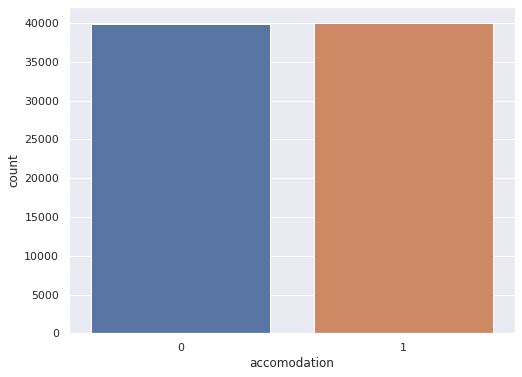

A    54.016756
B    20.677996
C    15.076453
D     9.466144
E     0.762651
Name: sourcing_channel, dtype: float64


Rural    39.660376
Urban    60.339624
Name: residence, dtype: float64


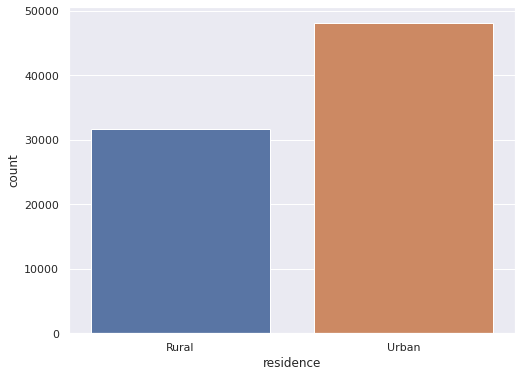

0     6.259001
1    93.740999
Name: default, dtype: float64


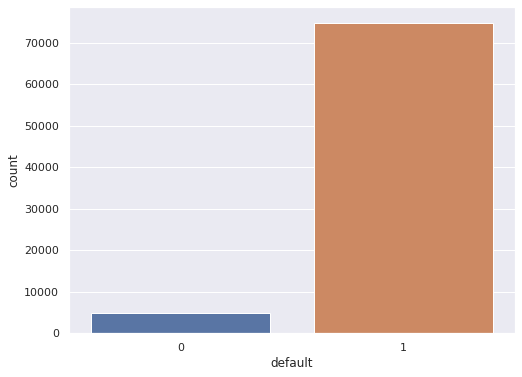

0     83.776439
1     11.052810
7      0.028803
2      3.154546
3      1.194695
8      0.018785
4      0.468361
5      0.210387
6      0.085156
13     0.001252
12     0.001252
10     0.001252
9      0.005009
11     0.001252
Name: count3_6, dtype: float64


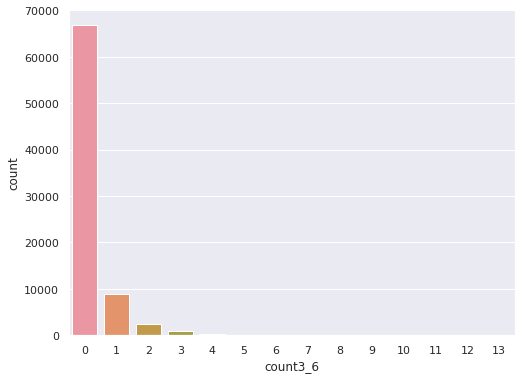

0     95.084718
3      0.396979
1      3.356167
4      0.162799
2      0.867845
11     0.002505
5      0.057606
9      0.005009
6      0.032560
8      0.006262
7      0.013775
10     0.005009
14     0.002505
13     0.002505
15     0.001252
17     0.001252
12     0.001252
Name: count6_12, dtype: float64


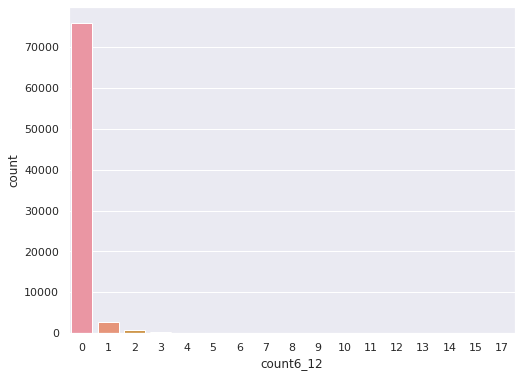

0     95.343944
4      0.060110
1      3.751894
2      0.623646
3      0.189097
5      0.016280
8      0.002505
6      0.007514
7      0.003757
11     0.001252
Name: count12_more, dtype: float64


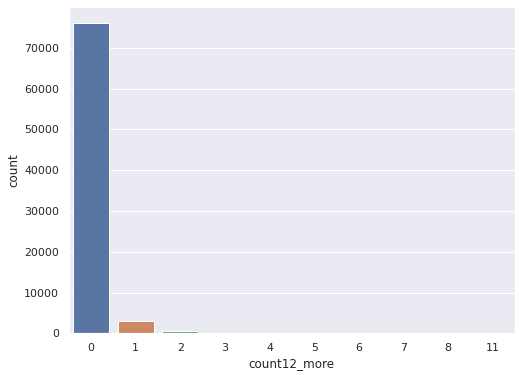

In [8]:
all_categories = ['marital_status', 'accomodation',
                'sourcing_channel', 'residence', 'default',
                'count3_6', 'count6_12',
                'count12_more']

for category in all_categories:
    # Top 5 in each category in terms of count in per cent
    stats = df[category].value_counts(normalize=True, sort=False)*100
    print(stats)
    plt.figure(figsize=(8,6))
    sns.countplot(x=category, data=df) 
    plt.show()

**Observations:**

- perc_premium_by_cash is the percentage of premium paid by cash. The mean is 31.4% and the third Q is at 53.8% meaning that few customers pays the premium by cash. 
- The average age of individuals in the dataset is 18846.7 days with the youngest individual being 7670 and the eldest 37602 days. With the 3rd Q being 22636 days we expect outliers for this attribute. We will transfor this variable later.
- The people, on average, paid a total of 10924 on premium. The maximum paid is 60000 and the minimum premium paid is 1200. The median is 7500 indicating likelihood of having outliers for this attribute. We will investigate that later.
- The mean of income is 208847 and the minimum income is 24030 with the maximum is 90262600 and the median is 166560 a clear indication of skewness. We will investigate this later also.
- On marital_status, 50.1% of the people are unmarried(0) and 49.9% are married.
- risk_score has a min of 91.9% and max of 99.9% with median of mean of 99.07% meaning that most clients are have risk_score near maximum than minimum. Infact 1st Q is at 98.83%.
- count3_6, third Q is 0 implying that most customers are paying the the premium on time. In fact 83.78% of the customers paid the premium on time and the rest delaying at least once. Maximu delay is 13, that is,13 times premium was paid 3-6 months late.
- For count_6-12, 95.1% of the customers paid on time with max of 17 times delay. 
- FOr count12_more, 95.3% paid on time with maximum of 11 times in delay.
- The mean number of vehicles owned is 2 with min at 1 and max at 3. This suggest that the insurance policy in this data might involve vehicle insurance cover.
- 60.3% of the customers reside in urban areas and the 39.7% in the rural.
- Majority of customers were source using channel A (54.02%) followed by channel B(20.7) and C coming third with 15.1%. The least of the customers representing 0.76% were sourced using method E.
- Classifications of customers based on accomodation classes is nearly 50-50. 49.87% renting and 50.13% are house owners.
- On no_of_premiums_paid, the max is 60. Inferring from this value and assuming that the premiums are paid monthly, we can hypothersise that the data was collected over a period of 60/12=5 years.
- 93.7% of the customers are non-defaulters.

In [9]:
numerical_cols = list(df.select_dtypes(np.number).columns)
print(numerical_cols)

['id', 'perc_premium_by_cash', 'age_in_days', 'income', 'count3_6', 'count6_12', 'count12_more', 'vehicles', 'dependants', 'risk_score', 'no_of_premiums_paid', 'premium']


In [10]:
# Function to plot histogram and boxplot for numerical variables as we study the 
# central tendency and dispersion for such values
def histogram_boxplot(feature, figsize=(10,8), bins = None):
    """ 
    Boxplot and histogram combined with shared axis
    feature: 1-d feature array
    figsize: size of fig (default (10,8))
    bins: number of bins (default None / auto)
    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, kde=False, ax=ax_hist2, bins=bins) if bins else sns.histplot(x=feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    y_min, y_max = ax_hist2.get_ylim()
    x_min, x_max = ax_hist2.get_xlim()
    print(0.8*max(feature), max(feature))
    print(0.8*y_max, y_max)
    x = 0.8*max(feature)
    y = 0.8*y_max
    if y<y_min:
        y = y_min
    ax_hist2.text(x_max, y, 'Skew: {}'.format(round(feature.skew(),2)), dict(size=15))
    ax_hist2.text(x_max, y-0.1*(y_max), 'Kurtosis: {}'.format(round(feature.kurtosis(),2)), dict(size=15))

In [11]:
histogram_boxplot(df.perc_premium_by_cash,bins=100)

0.8 1.0
8920.800000000001 11151.0


**Observation(perc_premium_by_cash):**
- Median is around 18% and mean roughly 30%. There is a spike at 0% and at 100% for those people who don't pay cash at all and those who pay by cash all the time, respectively.

In [12]:
# Income is outrageously highly skewed. The plot is hardly interprateable except for the
# clearly visible outliers.
histogram_boxplot(df.income)
plt.show()

# To make the plot more interpretable we are filtering the data to obtain individuals with
# 1.15 million in Income and below. The plot is now more interpretable but still highly
# skewed to the right.
histogram_boxplot(df[df.income<1150000].income)
plt.show()

72210080.0 90262600
2542.6800000000003 3178.35


919704.0 1149630
2892.1200000000003 3615.15


**Observations(Income):** Income is hightly skewed to the right with the few data points appearing as extreme outliers. This is clearly show with the plot and the skew value of 109.76.

**Observations(Filtered income):** On filtering income to only include data point withs income below 1.15 million the skew significantly drops to 1.95. The plots are now interpretable but still right skewed.

In [13]:
histogram_boxplot(df.risk_score)

79.912 99.89
4282.32 5352.9


In [14]:
histogram_boxplot(df.age_in_days, bins=30)

30081.600000000002 37602
5297.040000000001 6621.3


**Observation(Age):**

- Age is normally distributed but with upper outliers.
- The mean and median of age is around 19000 day.
- Age is positively skewed.

In [15]:
histogram_boxplot(df.no_of_premiums_paid, bins=50)

48.0 60
11786.04 14732.55


**Observation**
- The distribution on the no_of_premiums_paid till date is a normal distribution
- The median number is around 10 and the mean is ~12. Despite being normally distributed, the attributes values are is skewed to the right, but there are upper outliers.


In [16]:
histogram_boxplot(df.premium, bins=20)

48000.0 60000
15634.920000000002 19543.65


**Observations (Premium):**
- Right skewed with right outliers.

3.2 4
16980.600000000002 21225.75


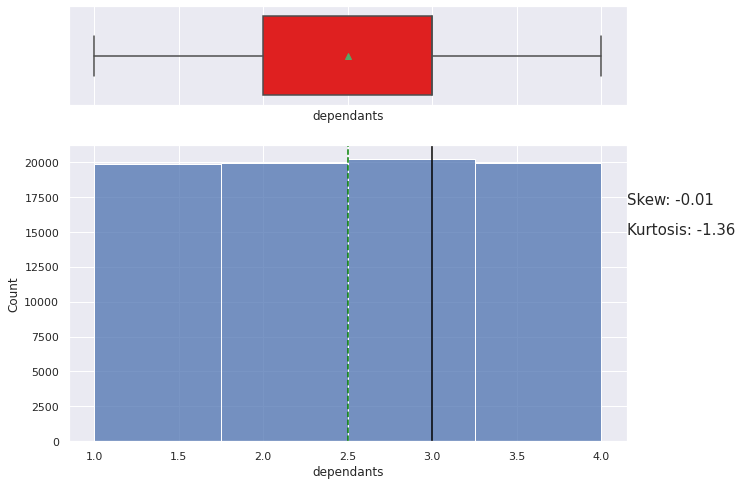

In [17]:
histogram_boxplot(df.dependants, bins=4)

**Observation**

The proportion of customers with 1,2,3 and 4 dependents is the same.

<AxesSubplot:>

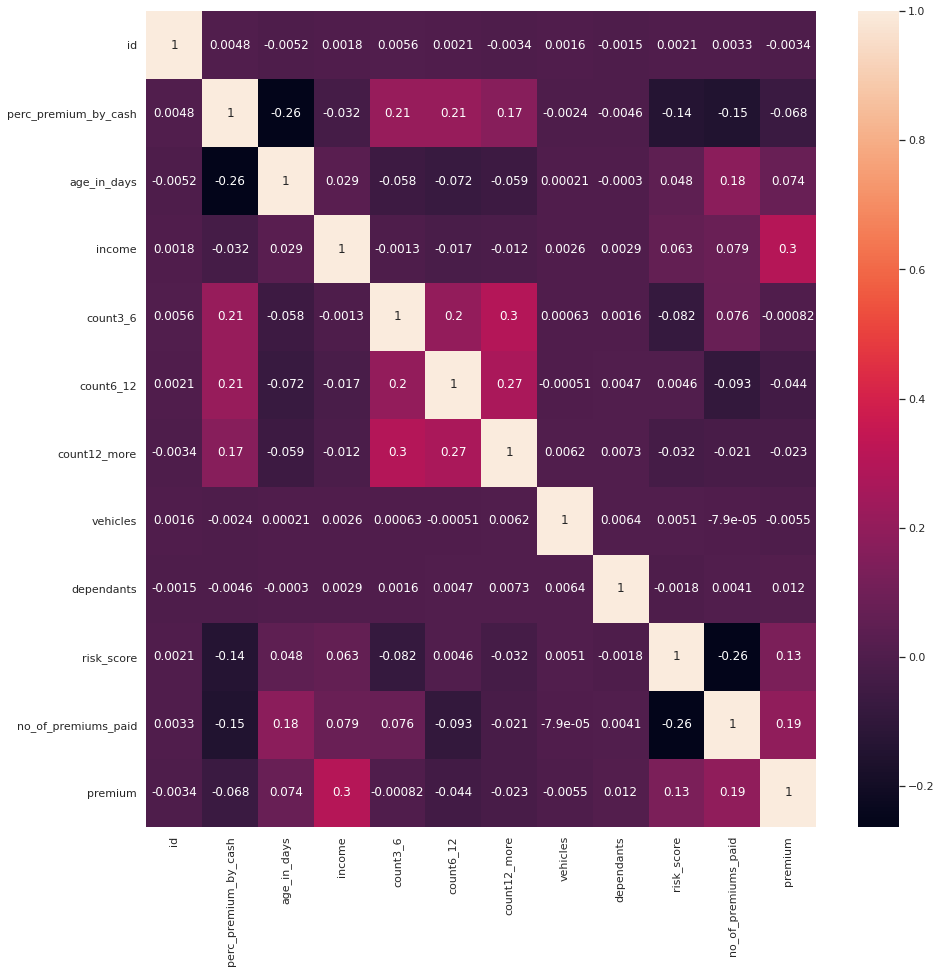

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

**Observations(correlation):**

- There are no numerical attributes that are highly correlated, be it negative or positive.

- It is, however, important to note the following attributes with slight correlation:
    - premium vs income: 0.3 - it is sensible to have this correlation presuming that high income earners will likely pay more premium.
    - no_of_premiums_paid vs premium: 0.19
    - The correlation between late payment classes is also relateable in the sense that an individual who has delayed for 3-6 months will likely delay to 6-12 and even beyound 12 months.
    - There is also a slight correlation between perc_premium_by_cash and the late payment.
    - There is also a slight negative correlation between no_of_premiums_paid and risk score (-0.26) worthnoting. 

default                  0         1
sourcing_channel                    
A                 0.054458  0.945542
B                 0.064559  0.935441
C                 0.075006  0.924994
D                 0.083874  0.916126
E                 0.075534  0.924466


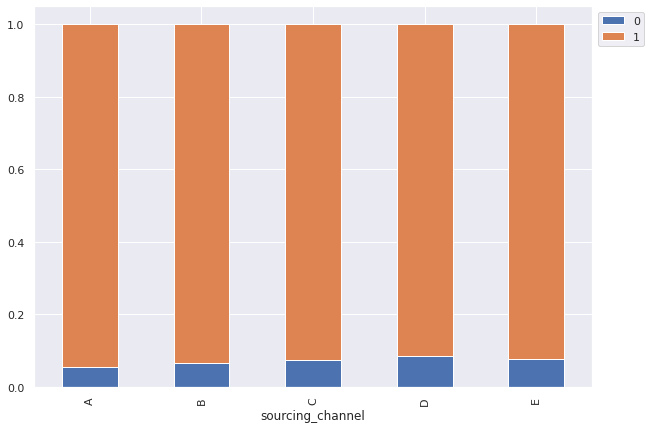

In [19]:
# Default status across sourcing channels
tab1 = pd.crosstab(df.sourcing_channel, df.default, margins=True)
tab2 = pd.crosstab(df.sourcing_channel, df.default, margins=False, normalize='index')
tab2.plot(kind='bar',stacked=True,figsize=(10,7))
print(tab2)
plt.legend(loc='lower left', frameon=False)
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

**Observations (Sourcing channel)**

- Sourcing Channels tends to have varying impact on default status..

- Customers sourced from Channel A have the lowest chance of Defaulting 
- Customers sourced from Channel D and E have the higher Chance of Defaulting as compared to Channel A 
- Customers sourced from D Channel have the highest chance of Defaulting, followed by those from channels C & E, whose risk of Defaulting seems to be the same, followed by those from B, while Customers from A have the lowest risk of Defaulting

default                0         1
marital_status                    
0               0.064224  0.935776
1               0.060948  0.939052


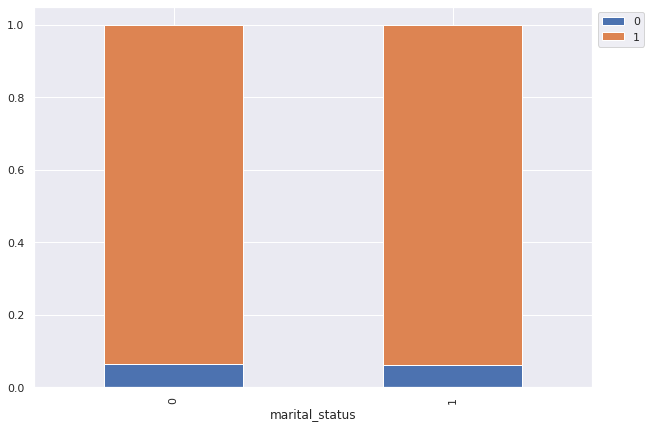

In [20]:
# Default status across marital status
tab1 = pd.crosstab(df.marital_status, df.default, margins=True)
tab2 = pd.crosstab(df.marital_status, df.default, margins=False, normalize='index')
tab2.plot(kind='bar',stacked=True,figsize=(10,7))
print(tab2)
plt.legend(loc='lower left', frameon=False)
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

- Marital Status doesn’t seem to have any impact on the whether a customer defauls or not, that is, similar proportion of defaulters exists between the married and the unmarried classes. 
- Most of the customers are none defaulters in both classes.

In [21]:
# Default status across residence type!
tab1 = pd.crosstab(df.residence, df.default, margins=True)
tab2 = pd.crosstab(df.residence, df.default, margins=False, normalize='index')
tab2.plot(kind='bar',stacked=True,figsize=(10,7))
print(tab2)
plt.legend(loc='lower left', frameon=False)
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

default           0         1
residence                    
Rural      0.063088  0.936912
Urban      0.062263  0.937737


- Residence doesn’t seem to have any significant on chances of default or otherwise.

<a id='part2'></a>

# PART 2

In [22]:
from matplotlib.ticker import PercentFormatter

In [23]:
# Assign our dataframe from part 1 into df2 just convenience of rememberance.
df2 = df.copy()

In [24]:
# Tranform variable: Convert age in days to age in years as age
df2["age"] = df2["age_in_days"].apply(lambda x:round(x/365))

# Drop age_in_days and id. id is just equivalent to panda's default index
df2.drop(["age_in_days", "id"], axis=1, inplace=True)

In [25]:
df2.head()

perc_premium_by_cash  income  count3_6  count6_12  count12_more  \
0                 0.317   90050         0          0             0   
1                 0.000  156080         0          0             0   
2                 0.015  145020         1          0             0   
3                 0.000  187560         0          0             0   
4                 0.888  103050         7          3             4   

  marital_status  vehicles  dependants accomodation  risk_score  \
0              0         3           3            1      98.810   
1              1         3           1            1      99.066   
2              0         1           1            1      99.170   
3              1         1           1            0      99.370   
4              0         2           1            0      98.800   

   no_of_premiums_paid sourcing_channel residence  premium default  age  
0                    8                A     Rural     5400       1   31  
1                    3                A     Urban    11700       1   83  
2                   14                C     Urban    18000       1   44  
3                   13                A     Urban    13800       1   65  
4                   15                A     Urban     7500       0   53

In [26]:
# Add new variable: income groups
# pandas cut function that can be used to group data in a convenient way

df2["income_groups"] = pd.cut(df2.income, bins=[0, 1e5, 2e5, 3e5, 4e5, 5e5, 6e5, df2.income.max()],\
       labels=["Under100K","100K-200K", "200K-300K", "300K-400K",\
               "400K-500K","500K-600K", "Above600K"])

Under100K    0.213179
100K-200K    0.398720
200K-300K    0.214983
300K-400K    0.104317
400K-500K    0.033549
500K-600K    0.014715
Above600K    0.020538
Name: income_groups, dtype: float64


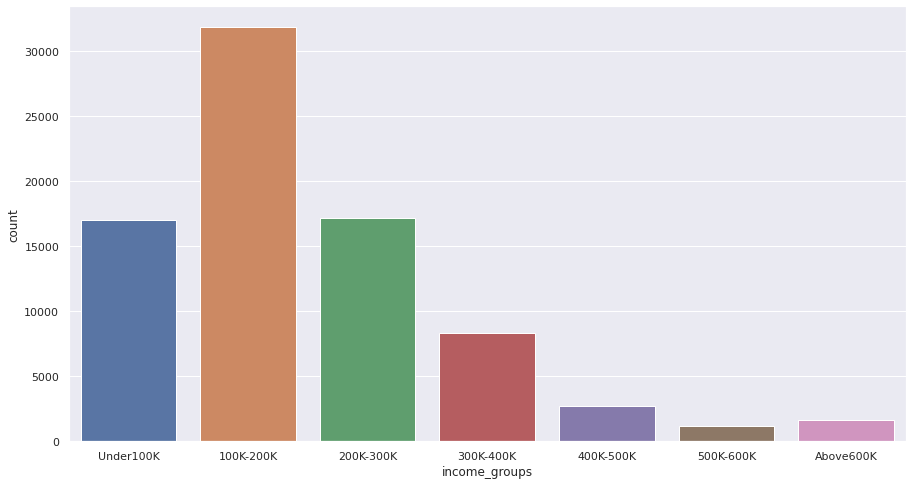

In [27]:
# Distribution of data across age groups
income_g = df2.income_groups.value_counts(sort=False, normalize=True)
print(income_g)

plt.figure(figsize=(15,8))
sns.countplot(x='income_groups', data=df2)
plt.show()

**Remark**
- ~21% of the individuals earns below 100K and only ~2% earning above 600 thousand. Majority of the people (39.87%) earns income of between 100K and 200K.

In [28]:
print(income_g.cumsum()) # cumulative sum

Under100K    0.213179
100K-200K    0.611899
200K-300K    0.826882
300K-400K    0.931199
400K-500K    0.964748
500K-600K    0.979462
Above600K    1.000000
Name: income_groups, dtype: float64


**Remark**
- ~21% of the individuals earns below 100K, ~93% below less than 400K and ~97% earns below 600K.

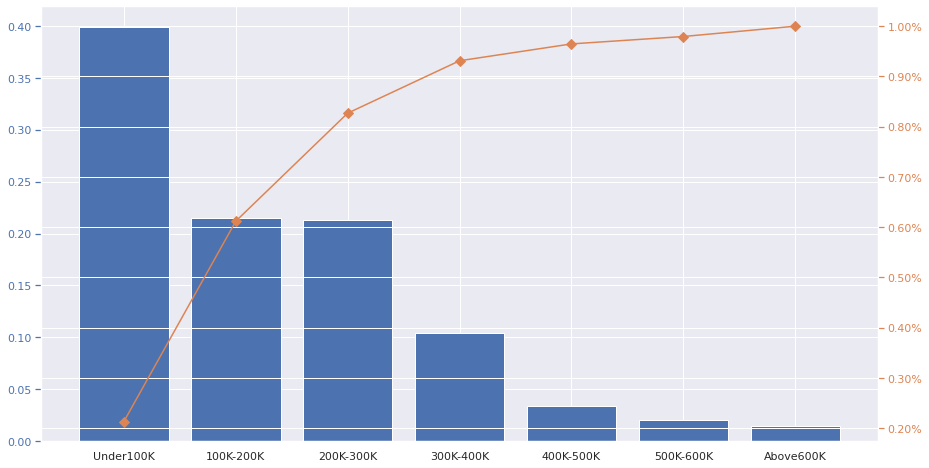

In [29]:
# Pareto chart for income groups
x = income_g.sort_values(ascending=False)
cumulative = income_g.cumsum()

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(income_g.index, x, color="C0")
ax2 = ax.twinx()
ax2.plot(income_g.index, cumulative, color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

In [30]:
# Add new variable- generate agegroups using pandas cut function as used before
df2["age_groups"] = pd.cut(df2.age, bins=[0,20,40,60,80,df2.age.max()],\
       right=True, labels=["Under20","Age20-40", "Age40-60", "Age60-80","Above80"])

Under20     0.000000
Age20-40    0.240141
Age40-60    0.483113
Age60-80    0.251124
Above80     0.025622
Name: age_groups, dtype: float64


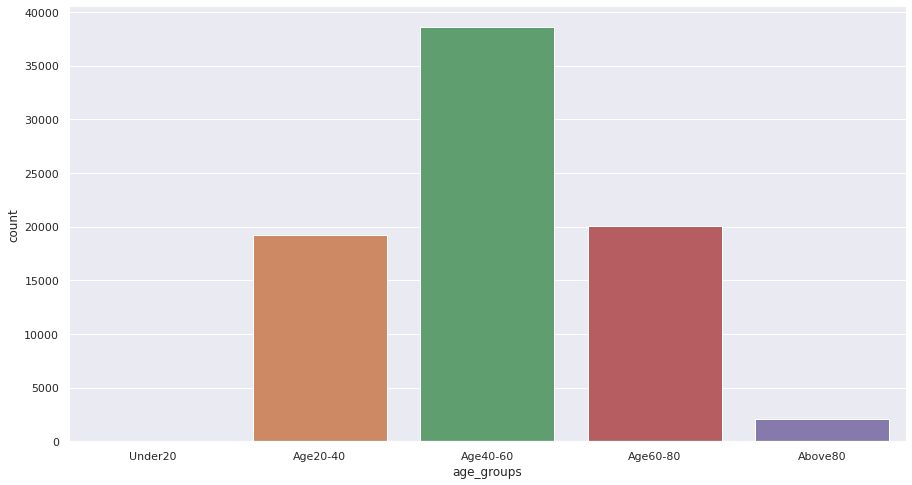

In [31]:
# Distribution of individuals across age groups
age_g = df2.age_groups.value_counts(sort=False, normalize=True)
print(age_g)

plt.figure(figsize=(15,8))
sns.countplot(x='age_groups', data=df2)
plt.show()

**Remark(s):**
- There is no one amongst the customers who is under 20 years of age. Majority of the customers making ~48% of all falls on the 40-60 age category. Only 2.6% of the customers are above 80.

In [32]:
print(age_g.cumsum()) # cumulative sum

Under20     0.000000
Age20-40    0.240141
Age40-60    0.723254
Age60-80    0.974378
Above80     1.000000
Name: age_groups, dtype: float64


**Remark**

- There is no one under 20, ~72% of the customers are under 60 and ~97% under 80.

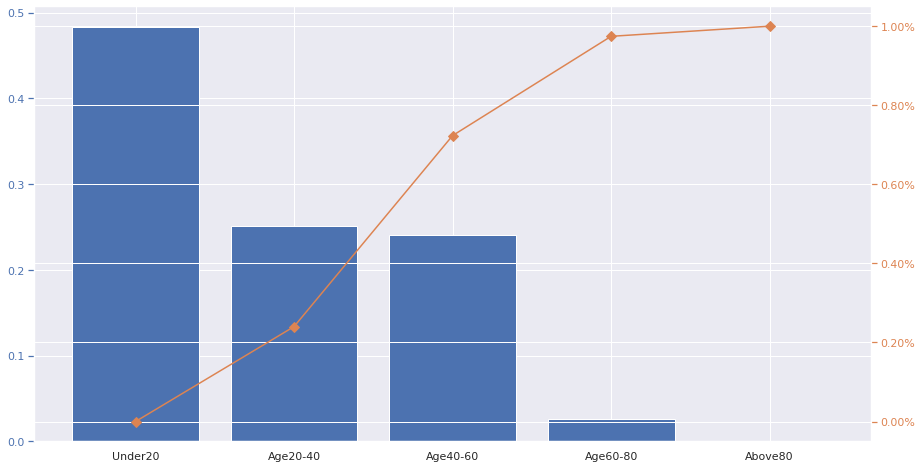

In [33]:
# Pareto chart for age groups
x = age_g.sort_values(ascending=False)
cumulative = age_g.cumsum()

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(age_g.index, x, color="C0")
ax2 = ax.twinx()
ax2.plot(age_g.index, cumulative, color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

residence         Rural     Urban
income_groups                    
Under100K      0.402690  0.597310
100K-200K      0.394233  0.605767
200K-300K      0.397041  0.602959
300K-400K      0.396759  0.603241
400K-500K      0.389324  0.610676
500K-600K      0.389787  0.610213
Above600K      0.390854  0.609146


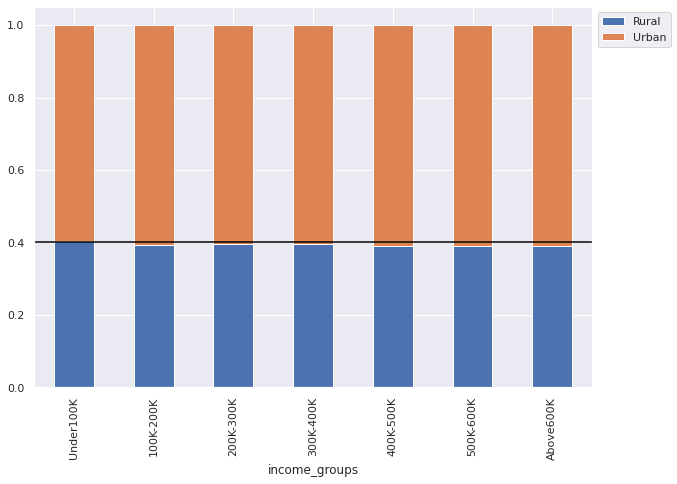

In [34]:
# Default status across sourcing channels
tab1 = pd.crosstab(df2.income_groups, df2.residence, margins=True)
tab2 = pd.crosstab(df2.income_groups, df2.residence, margins=False, normalize='index')
tab2.plot(kind='bar',stacked=True,figsize=(10,7))
print(tab2)
plt.legend(loc='lower left', frameon=False)
plt.axhline(0.4, color='black')
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

**Remark:** Around 60% of the customers stays in urban across all income groups. It is, however, notable that people of higher income class have a higher tendency of being in the urban than people in the low income class.

vehicles              1         2         3
income_groups                              
Under100K      0.335370  0.330259  0.334371
100K-200K      0.336286  0.329533  0.334181
200K-300K      0.331450  0.340595  0.327955
300K-400K      0.332293  0.330852  0.336855
400K-500K      0.355356  0.320269  0.324375
500K-600K      0.330213  0.316596  0.353191
Above600K      0.324390  0.349390  0.326220


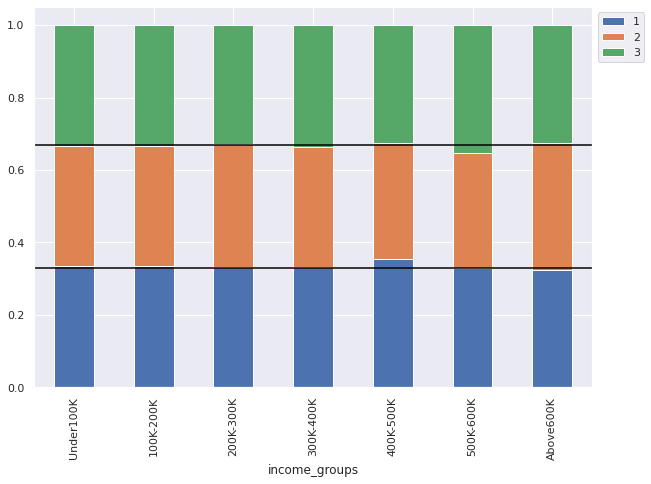

In [35]:
# Default status across sourcing channels
tab1 = pd.crosstab(df2.income_groups, df2.vehicles, margins=True)
tab2 = pd.crosstab(df2.income_groups, df2.vehicles, margins=False, normalize='index')
tab2.plot(kind='bar',stacked=True,figsize=(10,7))
print(tab2)
plt.legend(loc='lower left', frameon=False)
plt.axhline(0.67, color='black')
plt.axhline(0.33, color='black')
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

**Remark:** There is no clear trend of number of vehicles across income classes. In each income class, around 30% of the customers have 1, 2 and 3 vehicles.

In [36]:
# Default status across sourcing channels
tab1 = pd.crosstab(df2.income_groups, df2.sourcing_channel, margins=True)
tab2 = pd.crosstab(df2.income_groups, df2.sourcing_channel, margins=False, normalize='index')
tab2.plot(kind='bar',stacked=True,figsize=(10,7))
print(tab2)
plt.legend(loc='lower left', frameon=False)
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

sourcing_channel         A         B         C         D         E
income_groups                                                     
Under100K         0.691359  0.160254  0.097456  0.047700  0.003231
100K-200K         0.553221  0.211533  0.146550  0.083043  0.005653
200K-300K         0.470496  0.223510  0.177783  0.117901  0.010310
300K-400K         0.434214  0.223409  0.184754  0.144058  0.013565
400K-500K         0.376260  0.258679  0.200821  0.149683  0.014558
500K-600K         0.378723  0.248511  0.194894  0.167660  0.010213
Above600K         0.368293  0.223171  0.217073  0.171341  0.020122


**Observations:**
- There exist a relationship between income and sourcing channel.
- As we move up the income class ladder, the number of people sourced by channel A grows smaller and smaller.
- The number of people sourced from the other channels (B, C, D and E) increases across income classes.

In [37]:
income_groups_and_age = df2[['income_groups','age']].groupby(['income_groups']).mean().reset_index()
print(income_groups_and_age)

  income_groups        age
0     Under100K  49.132115
1     100K-200K  51.461415
2     200K-300K  52.279024
3     300K-400K  53.982233
4     400K-500K  54.496081
5     500K-600K  55.193191
6     Above600K  53.754268


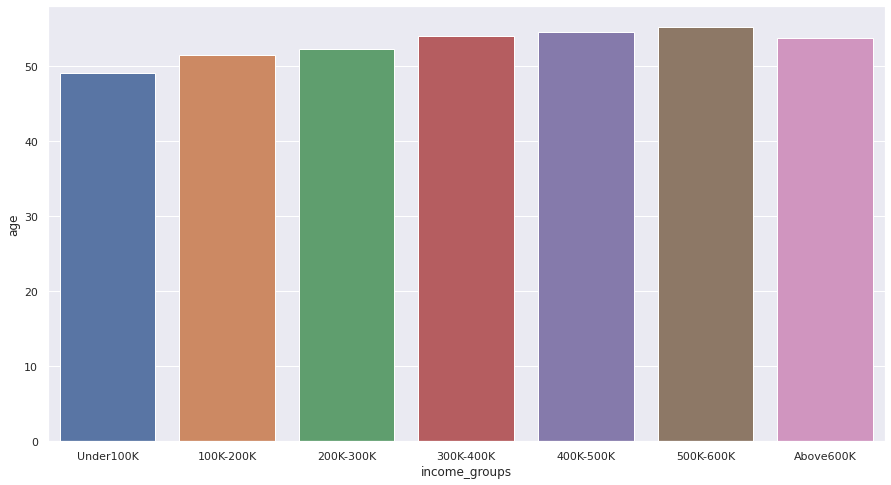

In [38]:
plt.figure(figsize=(15,8))
sns.barplot(x='income_groups', y='age', data=income_groups_and_age)
plt.show()

**Remark:** As age increases, income also increases, as expected. This is a general trend.

In [39]:
income_groups_and_premium = df2[['income_groups','premium']].groupby(['income_groups']).mean().reset_index()
income_groups_and_premium

income_groups       premium
0     Under100K   4384.374082
1     100K-200K   8059.012532
2     200K-300K  13091.739966
3     300K-400K  18093.025210
4     400K-500K  23759.126540
5     500K-600K  29584.851064
6     Above600K  41009.085366

In [40]:
plt.figure(figsize=(15,8))
sns.barplot(x='income_groups', y='premium', data=income_groups_and_premium)
plt.show()

**Remark:** Higher income earners pays more premium than low income earners (as expected).

In [41]:
income_groups_and_cash = df2[['income_groups','perc_premium_by_cash']].groupby(['income_groups']).mean().reset_index()
income_groups_and_cash

income_groups  perc_premium_by_cash
0     Under100K              0.379262
1     100K-200K              0.318519
2     200K-300K              0.282890
3     300K-400K              0.256217
4     400K-500K              0.271313
5     500K-600K              0.273282
6     Above600K              0.280918

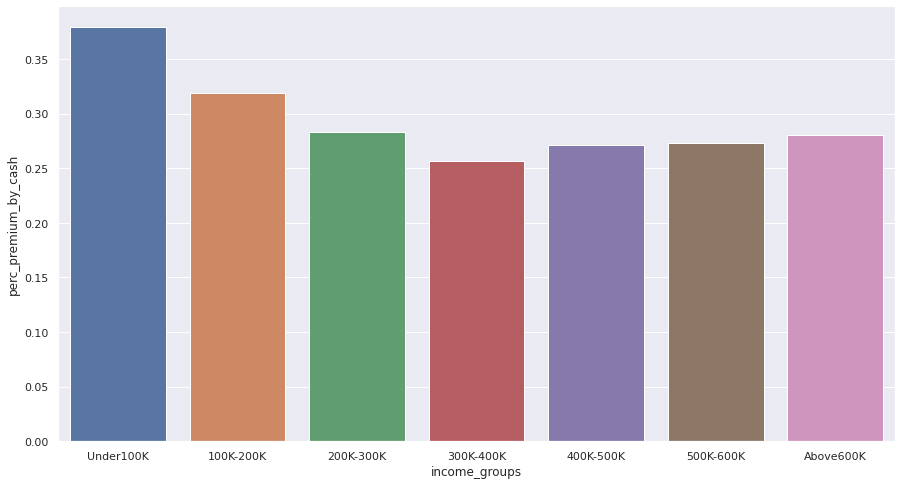

In [42]:
plt.figure(figsize=(15,8))
sns.barplot(x='income_groups', y='perc_premium_by_cash', data=income_groups_and_cash)
plt.show()

**Remark:** Of the people paying by cash, majority are low income earners. As income increases, customers moves away from cash payment.

default               0         1
income_groups                    
Under100K      0.088938  0.911062
100K-200K      0.066240  0.933760
200K-300K      0.047067  0.952933
300K-400K      0.037815  0.962185
400K-500K      0.041433  0.958567
500K-600K      0.045957  0.954043
Above600K      0.053049  0.946951


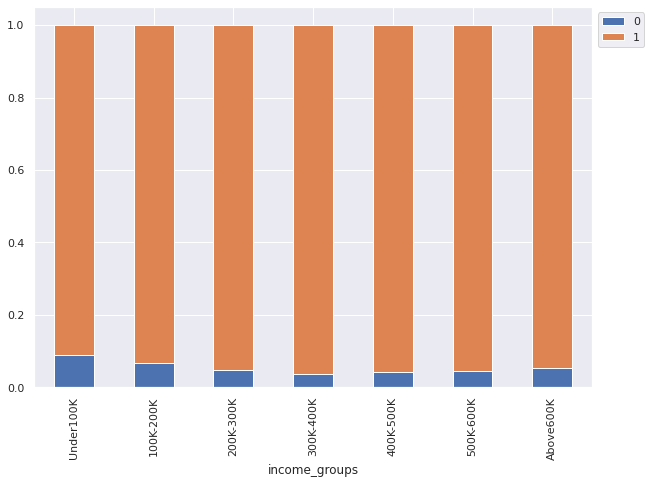

In [43]:
# Default status across sourcing channels
tab1 = pd.crosstab(df2.income_groups, df2.default, margins=True)
tab2 = pd.crosstab(df2.income_groups, df2.default, margins=False, normalize='index')
tab2.plot(kind='bar',stacked=True,figsize=(10,7))
print(tab2)
plt.legend(loc='lower left', frameon=False)
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

**Observation:** More defaulters are low income earners.

In [44]:
# Default status across sourcing channels
tab1 = pd.crosstab(df2.income_groups, df2.age_groups, margins=True)
tab2 = pd.crosstab(df2.income_groups, df2.age_groups, margins=False, normalize='index')
tab2.plot(kind='bar',stacked=True,figsize=(10,7))
print(tab2)
plt.legend(loc='lower left', frameon=False)
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

age_groups     Age20-40  Age40-60  Age60-80   Above80
income_groups                                        
Under100K      0.376314  0.333607  0.251131  0.038947
100K-200K      0.259556  0.462043  0.250259  0.028142
200K-300K      0.176909  0.571329  0.234170  0.017592
300K-400K      0.109724  0.611164  0.262665  0.016447
400K-500K      0.094065  0.609929  0.290407  0.005599
500K-600K      0.086809  0.597447  0.305532  0.010213
Above600K      0.122561  0.581098  0.283537  0.012805


**Observation:** Older people earns more.

default            0         1
age_groups                    
Age20-40    0.089695  0.910305
Age40-60    0.067344  0.932656
Age60-80    0.031566  0.968434
Above80     0.022972  0.977028


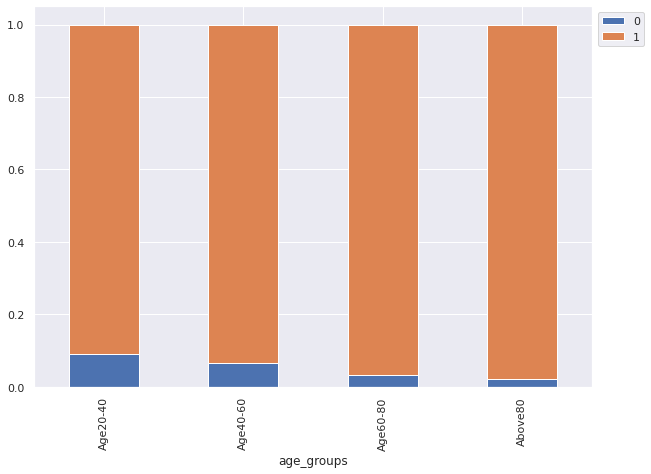

In [45]:
# Default status across sourcing channels
tab1 = pd.crosstab(df2.age_groups, df2.default, margins=True)
tab2 = pd.crosstab(df2.age_groups, df2.default, margins=False, normalize='index')
tab2.plot(kind='bar',stacked=True,figsize=(10,7))
print(tab2)
plt.legend(loc='lower left', frameon=False)
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

**Observation:** Younger customers default more than older people.

In [46]:
income_groups_and_cash = df2[['age_groups','perc_premium_by_cash']].groupby(['age_groups']).mean().reset_index()
income_groups_and_cash

age_groups  perc_premium_by_cash
0    Under20                   NaN
1   Age20-40              0.420580
2   Age40-60              0.325038
3   Age60-80              0.211763
4    Above80              0.120219

In [47]:
plt.figure(figsize=(15,8))
sns.barplot(x='age_groups', y='perc_premium_by_cash', data=income_groups_and_cash)
plt.show()

residence      Rural     Urban
age_groups                    
Age20-40    0.396224  0.603776
Age40-60    0.398388  0.601612
Age60-80    0.393557  0.606443
Above80     0.396383  0.603617


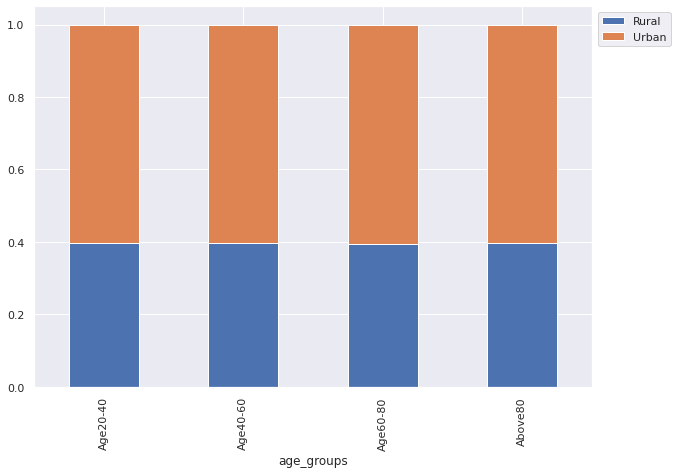

In [48]:
# Default status across sourcing channels
tab1 = pd.crosstab(df2.age_groups, df2.residence, margins=True)
tab2 = pd.crosstab(df2.age_groups, df2.residence, margins=False, normalize='index')
tab2.plot(kind='bar',stacked=True,figsize=(10,7))
print(tab2)
plt.legend(loc='lower left', frameon=False)
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

**Observation:** Roughly equal number of people (60%) across age groups stays in the urban

accomodation         0         1
age_groups                      
Age20-40      0.494837  0.505163
Age40-60      0.499974  0.500026
Age60-80      0.498778  0.501222
Above80       0.510264  0.489736


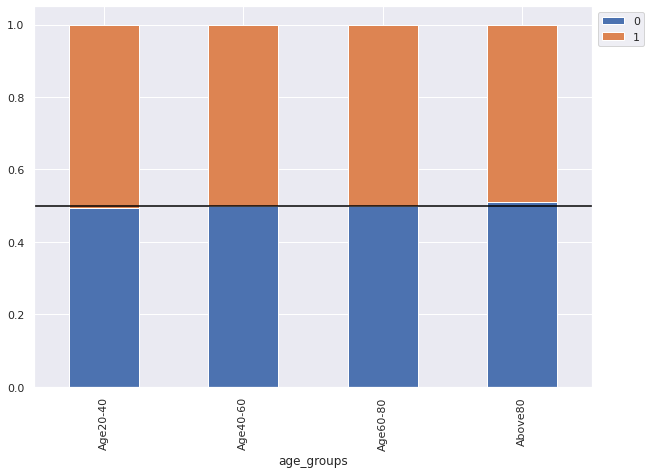

In [49]:
# Default status across sourcing channels
tab1 = pd.crosstab(df2.age_groups, df2.accomodation, margins=True)
tab2 = pd.crosstab(df2.age_groups, df2.accomodation, margins=False, normalize='index')
tab2.plot(kind='bar',stacked=True,figsize=(10,7))
print(tab2)
plt.axhline(0.5, color='black')
plt.legend(loc='lower left', frameon=False)
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

**Observation:** There is no clear relation between accomodation type and the age groups.

In [50]:
# Default status across sourcing channels
tab1 = pd.crosstab(df2.age_groups, df2.marital_status, margins=True)
tab2 = pd.crosstab(df2.age_groups, df2.marital_status, margins=False, normalize='index')
tab2.plot(kind='bar',stacked=True,figsize=(10,7))
print(tab2)
plt.legend(loc='lower left', frameon=False)
plt.axhline(0.5)
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

marital_status         0         1
age_groups                        
Age20-40        0.501147  0.498853
Age40-60        0.501659  0.498341
Age60-80        0.501920  0.498080
Above80         0.490714  0.509286


**Observation:** More people are married at older age.

In [51]:
# Late premium - establish people who have been late for at least 3 months
df2['late_pay'] = df2.count3_6 + df2.count6_12 + df2.count12_more

# late is 1 and 0 otherwise
df2.loc[df2['late_pay']>0, 'late_pay'] = 1

df2.late_pay = df2.late_pay.astype('category')

In [52]:
df2.late_pay.value_counts(normalize=True)

# 79.7% of the customers have at least delayed payment for at least three months.

0    0.797027
1    0.202973
Name: late_pay, dtype: float64

In [53]:
# Default status across sourcing channels
tab1 = pd.crosstab(df2.age_groups, df2.late_pay, margins=True)
tab2 = pd.crosstab(df2.age_groups, df2.late_pay, margins=False, normalize='index')
tab2.plot(kind='bar',stacked=True,figsize=(10,7))
print(tab2)
plt.legend(loc='lower left', frameon=False)
plt.axhline(0.5)
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

late_pay           0         1
age_groups                    
Age20-40    0.760534  0.239466
Age40-60    0.777697  0.222303
Age60-80    0.859123  0.140877
Above80     0.894917  0.105083


**Observation:** Older people are less likely to pay late than younger customers.

In [54]:
# Default status across sourcing channels
tab1 = pd.crosstab(df2.income_groups, df2.late_pay, margins=True)
tab2 = pd.crosstab(df2.income_groups, df2.late_pay, margins=False, normalize='index')
tab2.plot(kind='bar',stacked=True,figsize=(10,7))
print(tab2)
plt.legend(loc='lower left', frameon=False)
plt.axhline(0.5, color='black')
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

late_pay              0         1
income_groups                    
Under100K      0.773777  0.226223
100K-200K      0.790728  0.209272
200K-300K      0.812140  0.187860
300K-400K      0.830012  0.169988
400K-500K      0.810004  0.189996
500K-600K      0.811915  0.188085
Above600K      0.803049  0.196951


late_pay         0         1
default                     
0         0.372349  0.627651
1         0.825382  0.174618


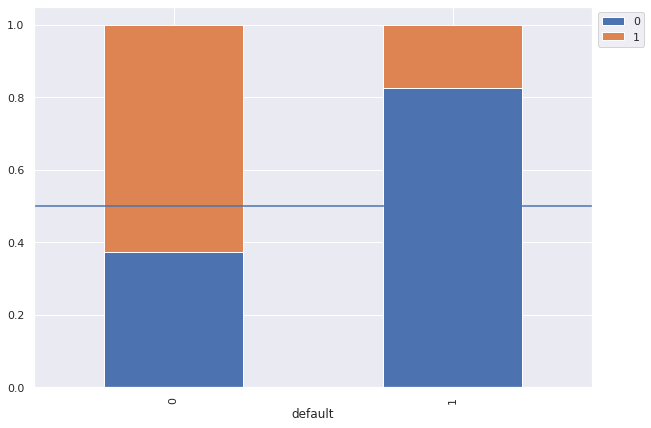

In [55]:
# Default status across sourcing channels
tab1 = pd.crosstab(df2.default, df2.late_pay, margins=True)
tab2 = pd.crosstab(df2.default, df2.late_pay, margins=False, normalize='index')
tab2.plot(kind='bar',stacked=True,figsize=(10,7))
print(tab2)
plt.legend(loc='lower left', frameon=False)
plt.axhline(0.5)
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

**Observation:** As expected, majority of the customer with late repayment defaulted and majority of those who never delayed for more than 3 months, least defaulted.

In [56]:
income_groups_and_no = df2[['default','no_of_premiums_paid']].groupby(['default']).mean().reset_index()
income_groups_and_no

default  no_of_premiums_paid
0       0            10.410364
1       1            10.894169

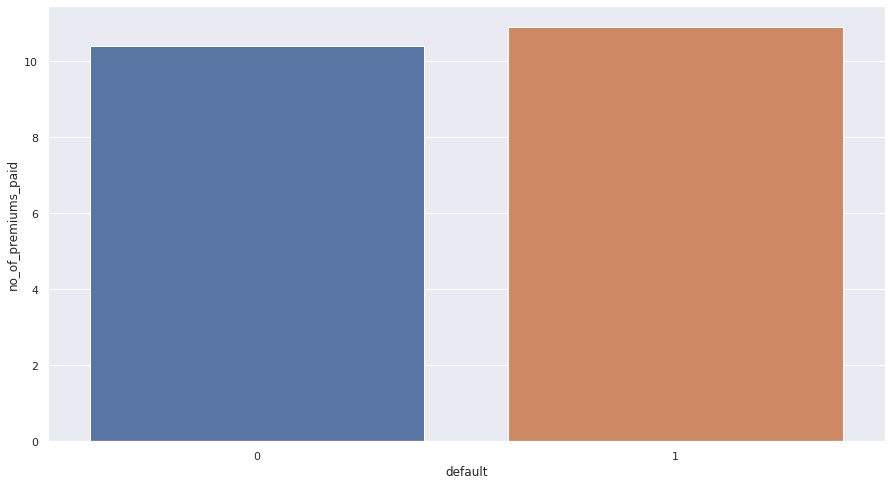

In [57]:
plt.figure(figsize=(15,8))
sns.barplot(x='default', y='no_of_premiums_paid', data=income_groups_and_no)
plt.show()

### Treating outliers

In [58]:
numerical_cols = list(df2.select_dtypes(np.number).columns)
print(numerical_cols)

['perc_premium_by_cash', 'income', 'count3_6', 'count6_12', 'count12_more', 'vehicles', 'dependants', 'risk_score', 'no_of_premiums_paid', 'premium', 'age']


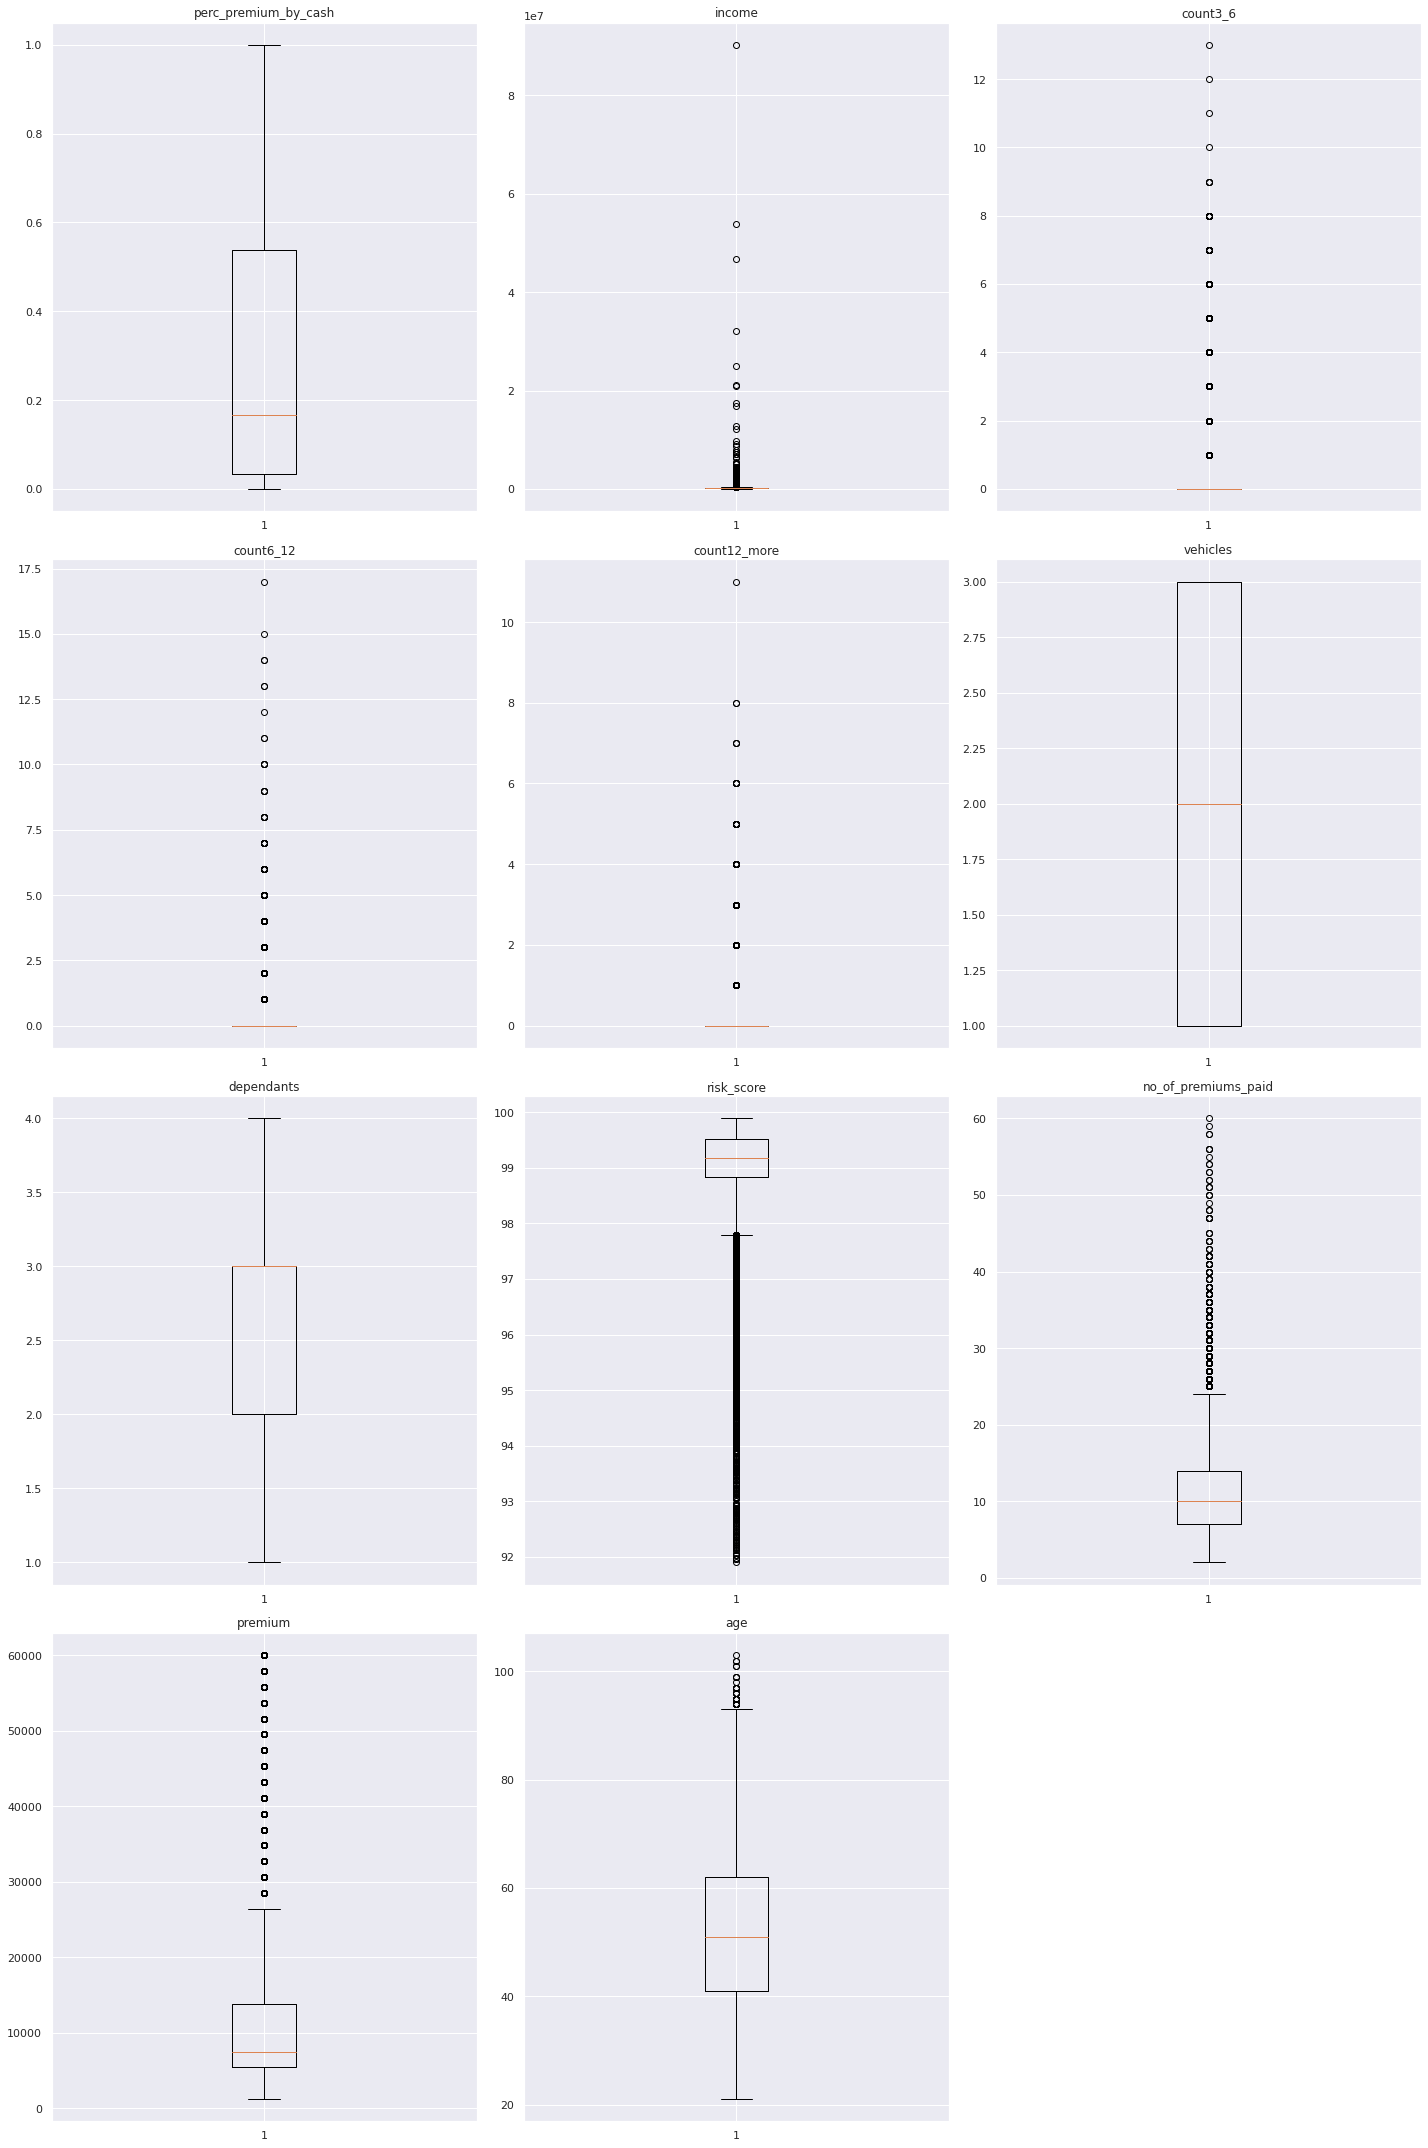

In [59]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))
for i, variable in enumerate(numerical_cols):
    plt.subplot(4,3,i+1)
    plt.boxplot(df2[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [60]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
    # and all the values above upper_whishker will be assigned value of upper_Whisker 
    print(col, 'L_whisker: ', Lower_Whisker, 'U_whisker: ', Upper_Whisker)
    return df
    

In [61]:
df2_original = df2.copy()

In [62]:
# treating outliers for the following columns
col_list = [
    'income',
    'risk_score',
    'no_of_premiums_paid',
    'premium',
    'age'
]

for c in col_list:
    df2 = treat_outliers(df2,c)

income L_whisker:  -108110.0 U_whisker:  468210.0
risk_score L_whisker:  97.795 U_whisker:  100.55499999999999
no_of_premiums_paid L_whisker:  -3.5 U_whisker:  24.5
premium L_whisker:  -7200.0 U_whisker:  26400.0
age L_whisker:  9.5 U_whisker:  93.5


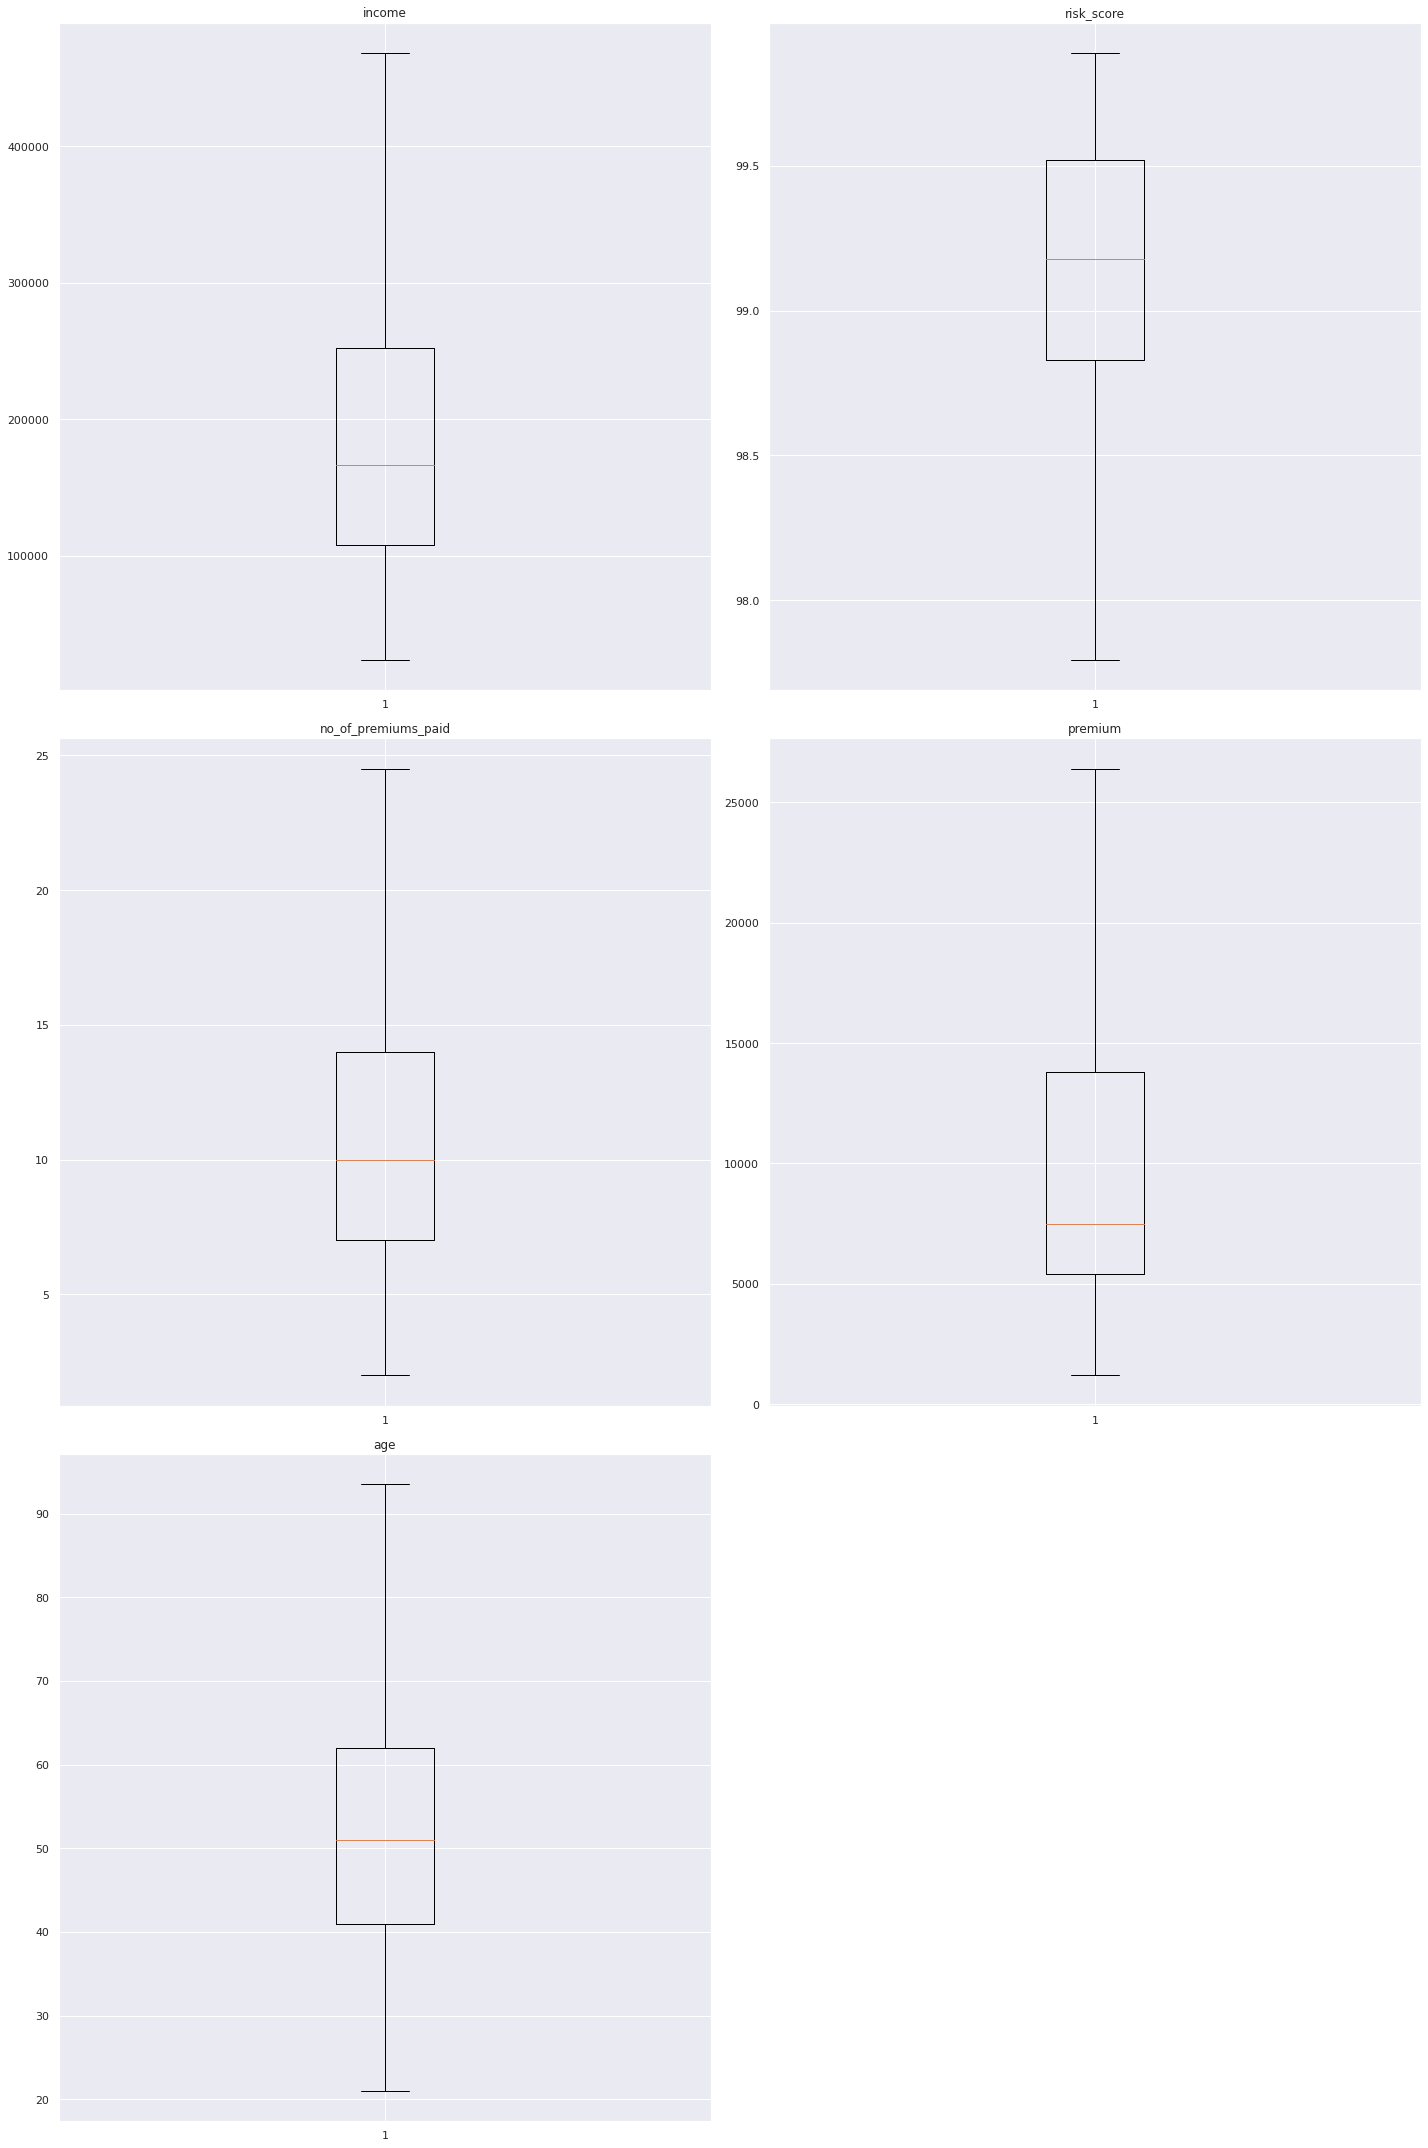

In [63]:
# Check that outliers has been treated boxplot
plt.figure(figsize=(20,30))
for i, variable in enumerate(col_list):
    plt.subplot(3,2,i+1)
    plt.boxplot(df2[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()